In [492]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from tpot import TPOTRegressor
import warnings

/home/williamjwall/.pyenv/versions/3.10.6/envs/aquaverti/lib/python3.10/site-packages/tpot/builtins/__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


In [2]:
df_air = pd.read_csv('../../raw_data/Gida Will --_ Water & Air Data  - Air Data.csv')

In [3]:
df_air['Température 1 (◦C)'].value_counts()

24.6     148
24.2     139
24.3     122
24.1     110
24.5     108
        ... 
26.69      1
26.71      1
26.72      1
26.88      1
17.68      1
Name: Température 1 (◦C), Length: 1010, dtype: int64

In [4]:
df_air.columns

Index(['Date', 'Température 1 (◦C)', 'Température 2 (◦C)',
       'Température 3 (◦C)', 'Humidité 1 (%)', 'Humidité 2 (%)',
       'Humidité 3 (%)', 'CO2 (ppm)', 'Unnamed: 8'],
      dtype='object')

In [5]:
df_g1 = pd.read_csv('../../raw_data/Gida Will --_ Water & Air Data  - Groupe 1 (Twr 1,2,3,4).csv', low_memory=False)
df_g1.columns = df_g1.iloc[0] 
df_g1 = df_g1[1:]

In [6]:
print(df_g1.columns)
print(f'\n length: {len(df_g1.columns)}')
print(len(df_g1))

Index([                  'Date',       'nutriments (S21)',
                     'Avg. E.C',       'Water Temp (S22)',
               'Avg. TEMP (°F)',               'pH (S23)',
                      'Avg. pH', 'twr  level (in " S31) ',
         'Avg. Tower Level (")',           'Dissolved O2',
                'Avg. DO (ppm)',        'Flowswitch (D1)',
              'tower valv (R1)',        'tower pump (R2)',
              'Lvl ntrlck (R3)',        'PRGHGHCOND (R4)',
                   'Alarm (R5)',            'Manual (R6)',
                  'Manual (R7)',            'Manual (R8)',
               'PSC pump (A41)',           'nutA&B (A42)',
               'pH- Pump (A43)',         'pH+ Pump (A44)',
                            nan,                      nan,
                            nan,                      nan,
                            nan,                      nan,
                            nan,                      nan],
      dtype='object', name=0)

 length: 32
29608


In [145]:
df_g2 = pd.read_csv('../../raw_data/Gida Will --_ Water & Air Data  - Groupe 2 (Twr 5,6,7,8).csv', low_memory=False)
df_g2.columns = df_g2.iloc[0] 
df_g2 = df_g2[1:]

In [8]:
print(df_g2.columns)
print(f'\n length: {len(df_g2.columns)}')
print(len(df_g2))

Index([                  'Date',              'PSC (S11)',
                     'Avg. PSC',       'nutriments (S21)',
                     'Avg. E.C',       'Water Temp (S24)',
               'Avg. TEMP (°F)',               'pH (S23)',
                       'Avg pH', 'twr  level (in " S31) ',
         'Avg. Tower Level (")',        'Flowswitch (D1)',
              'tower valv (R1)',        'tower pump (R2)',
              'Lvl ntrlck (R3)',        'PRGHGHCOND (R4)',
                   'Alarm (R5)',            'Manual (R6)',
                  'Manual (R7)',            'Manual (R8)',
               'PSC pump (A41)',           'nutA&B (A42)',
               'pH- Pump (A43)',         'pH+ Pump (A44)',
                   'Off / On 1',             'Off / On 2',
                   'Off / On 3',               'Comments',
                            nan,                      nan,
                            nan],
      dtype='object', name=0)

 length: 31
55066


In [9]:
df_g2['Lvl ntrlck (R3)'].value_counts()

Off    48891
On      2405
Name: Lvl ntrlck (R3), dtype: int64

In [10]:
df_g56 = pd.read_csv('../../raw_data/Gida Will --_ Water & Air Data  - Group 5 & 6 (Twr 17 to 24).csv', low_memory=False)
df_g56.columns = df_g56.iloc[0] 
df_g56 = df_g56[1:]

In [11]:
print(df_g56.columns)
print(f'\n length: {len(df_g56.columns)}')
print(len(df_g56))

Index([            'Date',   'G6 nutAB (S11)',    'G6 temp (S12)',
            'G6 Ph (S13)',    'G6 Temp (S14)',   'G5 nutAB (S21)',
          'G5 temp (S22)',      'G5 Ph (S23)',    'G5 Temp (S24)',
            'G6 dO (S31)',  'G6 TnkLVL (S32)',  'G5 TnkLVL (S33)',
            'G5 dO (S34)',     'G6 Flow (D1)',     'G5 Flow (D2)',
       'G6 tnkFEED (R11)',          '- (R12)', 'G5 TnkFEED (R13)',
                '- (R14)',          '- (R21)',          '- (R22)',
                '- (R23)',          '- (R24)', 'G6 Tnk PMP (R31)',
                '- (R32)', 'G5 Tnk PMP (R33)',          '- (R34)',
       'G6 nAB pmp (A41)', 'G6 Ph pump (A42)', 'G5 nAB pmp (A43)',
       'G5 Ph pump (A44)',                nan],
      dtype='object', name=0)

 length: 32
131554


In [12]:
import re

def key_cleaner(df):
    cleaned_keys = []
    keys = df.columns
    for i in keys:
        print(i[0])
        cleaned_keys.append(i.strip().lower().replace(' ','_'))
    return cleaned_keys

In [13]:
!pwd

/home/williamjwall/code/gidahusa/Aquaverti-Data-Analysis/notebooks


In [14]:
# import pandas as pd
# import glob
# import os

# path = r'../../raw_data'
# all_files = glob.glob(os.path.join(path , "*.csv"))

# lista = []

# for filename in all_files:
#     df = pd.read_csv(filename, index_col=None, header=0, low_memory=False)
#     lista.append(df)

# frame = pd.concat(lista, axis=0, ignore_index=True)

In [15]:
# frame.shape

In [553]:
plant_health_df = pd.read_csv('../../raw_data/Copy of Copy of Trackers (2.0) - Plant health.csv')
harvest_df = pd.read_csv('../../raw_data/Copy of Copy of Trackers (2.0) - Harvest.csv')

In [17]:
# plant_health_df['Tower:'].value_counts().sort_values(ascending=False)

In [542]:
grouping_towers_dicta = {"group 1": ["Tower 1", "Tower 2","Tower 3", "Tower 4"],
                         "group 2": ["Tower 5", "Tower 6","Tower 7", "Tower 8"],
                         "group 5/6": ["Tower 14", "Tower 15","Tower 16", "Tower 17", "Tower 18", "Tower 19","Tower 20", "Tower 21", "Tower 22", "Tower 23","Tower 24"],
                         "group other": ["Tower 9", "Tower 10","Tower 11", "Tower 12", "Tower 13"]}

In [557]:
harvest_df["Tower location:"].replace(grouping_towers_dicta["group 1"], "group 1", inplace=True)

In [558]:
harvest_df["Tower location:"].replace(grouping_towers_dicta["group 2"], "group 2", inplace=True)

In [559]:
harvest_df["Tower location:"].replace(grouping_towers_dicta["group 5/6"], "group 5/6", inplace=True)

In [560]:
harvest_df["Tower location:"].replace(grouping_towers_dicta["group other"], "group other", inplace=True)

In [561]:
harvest_df['Tower location:'].value_counts().sort_values(ascending=False)

group 1         2010
group 2         1945
group 5/6        539
group other       78
                   1
Name: Tower location:, dtype: int64

In [562]:
group_1_harvest = harvest_df.groupby("Tower location:").get_group('group 1')[['Harvest date:','Transplant date:','Level location:', 'Total floats harvested:', "Product:", 'Total weight for floats: (grams)', 'Avg weight per plant:']]

In [146]:
df_g2['Date'] = pd.to_datetime(df_g2['Date'])

In [563]:
group_1_harvest.head(2)

,Harvest date:,Transplant date:,Level location:,Total floats harvested:,Product:,Total weight for floats: (grams),Avg weight per plant:
29,11/30/2020,11/16/2020,Level 4,9,Romaine (Dragoon),9334.0,14.40
32,12/1/2020,11/20/2020,Level 5,10,Romaine (Truchas),5585.0,7.76


In [567]:
group_1_harvest["Product:"].value_counts()

Lettuce (Muir)            855
Kale (Starbor)            501
Romaine (Monte Carlo)     317
Romaine (Dragoon)         209
Arugula (Standard)         58
Lettuce (Butterhead)       29
Romaine (Truchas)          15
Lettuce (Rouxai)           13
Lettuce (Biondi)            4
Arugula (Astro)             3
Arugula (Sylvetta)          1
Sorrel                      1
Kale (Baby Kale)            1
Romaine (Green Forest)      1
Spinach (Perpetual)         1
Lettuce (Tennis ball)       1
Name: Product:, dtype: int64

In [570]:
df_g1['Date'] = pd.to_datetime(df_g1['Date'])

In [568]:
group_1_harvest['Harvest date:'] = pd.to_datetime(group_1_harvest['Harvest date:'])

In [569]:
group_1_harvest['Transplant date:'] = pd.to_datetime(group_1_harvest['Transplant date:'])

In [574]:
group_1_harvest_lettuceM = group_1_harvest.groupby("Product:").get_group("Lettuce (Muir)")

In [583]:
def average_of_cycle(dfy, dfX):
    lista = []
    lista2 = []
    for a, b in dfy[['Harvest date:', 'Transplant date:']].itertuples(index=False):
        lista.append(dfX[(dfX['Date'] < a) & (dfX['Date'] > b)])
    for i in lista:
        i = i.dropna(axis=1)
        i = i.set_index(i['Date'])
        i = i[i.columns[1:]].apply(lambda x: pd.to_numeric(x, errors='coerce'))
        df_mean = pd.DataFrame(i.select_dtypes(include=['float64','int64']).dropna(how='all', axis=1).mean()[:-10]).T
        lista2.append(df_mean)
    return lista2

In [584]:
avg_lista = average_of_cycle(group_1_harvest_lettuceM, df_g1)

In [606]:
len(avg_lista)

855

In [627]:
bool(len(avg_lista[800].iloc[0]))

True

In [630]:
avg_lista_cleaned = []
count = -1
for i in avg_lista:
    count += 1
    if len(avg_lista[count].iloc[0]) >= 4:
        avg_lista_cleaned.append(i)
    else:
        pass

In [632]:
avg_lista_cleaned[0]

,nutriments (S21),Water Temp (S22),pH (S23),"twr level (in "" S31)"
0,1.164888,68.600471,6.307939,16.410777


In [577]:
concat1_grp_1 = pd.concat(avg[0:1415], join='outer')

InvalidIndexError: Reindexing only valid with uniquely valued Index objects

In [347]:
lista45 = []
for i in avg[1416:]:
    lista45.append(pd.DataFrame(i.iloc[0][:7]).T)
concat2_grp_1 = pd.concat(lista45).dropna(axis=0, how='all')

In [351]:
g1_X = pd.concat([concat1_grp_1, concat2_grp_1])

<AxesSubplot: xlabel='0', ylabel='0'>

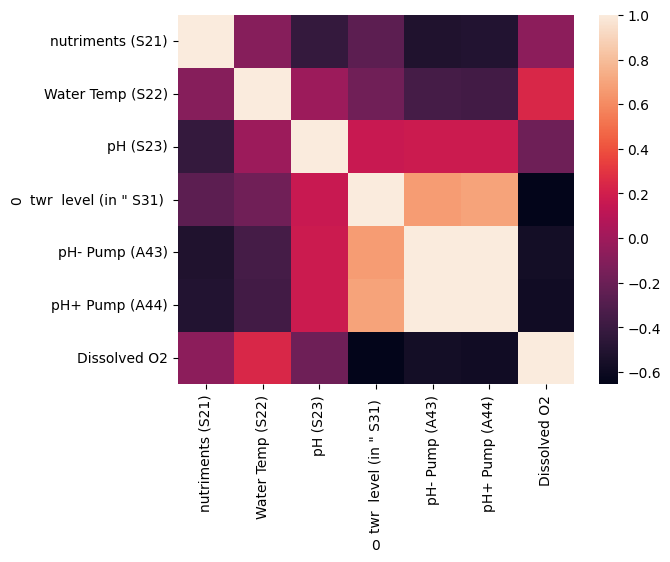

In [355]:
sns.heatmap(g1_X.corr())

In [354]:
g1_X.describe().T

,count,mean,std,min,25%,50%,75%,max
0,,,,,,,,
nutriments (S21),1562.0,1.707931,0.115163,1.088238,1.692293,1.759751,1.770820,1.808333
Water Temp (S22),1562.0,67.585130,6.687584,20.740119,67.821090,68.092354,68.780271,75.553086
pH (S23),1562.0,5.798517,0.090974,5.425905,5.786778,5.805929,5.821048,6.094828
"twr level (in "" S31)",1562.0,14.360130,0.467965,13.161936,14.141271,14.192691,14.653274,15.362463
pH- Pump (A43),979.0,24.639167,15.562826,8.697914,13.760603,18.714301,29.687885,71.591902
pH+ Pump (A44),979.0,24.045308,14.337525,8.710428,13.759750,18.532604,29.711917,69.393129
Dissolved O2,1249.0,2.692788,1.728025,-0.930681,1.742407,3.165567,3.872714,5.403525


In [402]:
dfXy_g1 = pd.concat([g1_X.reset_index(drop=True), group_1_harvest[436:].reset_index(drop=True)], axis=1)

In [442]:
dfXy_g1.dropna(axis=0, thresh=10, inplace=True)

In [516]:
g1_corr = dfXy_g1.drop(['Harvest date:', 'Transplant date:', 'Total floats harvested:','Total weight for floats: (grams)'], axis=1)

In [517]:
abs_corrsort = abs(g1_corr.corr()['Avg weight per plant:']).sort_values(ascending=False)[1:]

/tmp/ipykernel_13778/3563354070.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  abs_corrsort = abs(g1_corr.corr()['Avg weight per plant:']).sort_values(ascending=False)[1:]


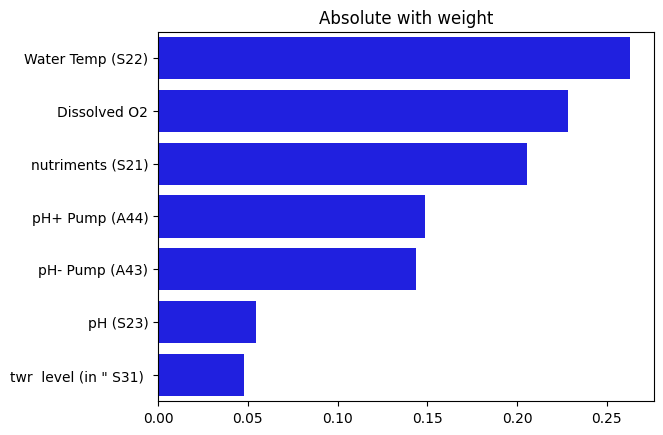

In [551]:
sns.barplot(x=abs_corrsort.values, 
            y=abs_corrsort.index, color='b').set(title='Absolute with weight');

In [477]:
X_g1 = dfXy_g1.drop(['Harvest date:', 'Transplant date:', 'Total floats harvested:','Total weight for floats: (grams)', 'Avg weight per plant:','pH- Pump (A43)', 'pH+ Pump (A44)'], axis=1)

In [478]:
y_g1 = dfXy_g1["Avg weight per plant:"]

In [485]:
X_train, X_test, y_train, y_test = train_test_split(X_g1, y_g1, test_size = 0.2)

In [486]:
#sns.pairplot(data=dfXy_g1.drop(['Harvest date:', 'Transplant date:', 'Total floats harvested:','Avg weight per plant:'], axis=1), kind='reg', diag_kind='hist', corner=True);

In [487]:
num_transformer = make_pipeline(SimpleImputer(), MinMaxScaler())
num_col = make_column_selector(dtype_include=['float64'])

cat_transformer = OneHotEncoder()
cat_col = make_column_selector(dtype_include=['object','bool'])

preproc = make_column_transformer(
    (num_transformer, num_col),
    (cat_transformer, cat_col),
    remainder='passthrough')

In [488]:
pipe_baseline = make_pipeline(preproc, LinearRegression())

In [489]:
pipe_baseline.fit(X_train, y_train)
y_pred = pipe_baseline.predict(X_test)
pipe_baseline_r2 = r2_score(y_test, y_pred)
pipe_baseline_mae = mean_absolute_error(y_test, y_pred)
pipe_baseline_mse = mean_squared_error(y_test, y_pred, squared=False)

In [490]:
print(f"r2: {pipe_baseline_r2},\nmae: {pipe_baseline_mae}, \nmse: {pipe_baseline_mse}")

r2: 0.13152636731360268,
mae: 6.145814696485624, 
mse: 7.454200072579534


In [527]:
X_train_preproc = preproc.fit_transform(X_train)
X_test_preproc = preproc.transform(X_test)
tpot = TPOTRegressor(generations=8, population_size=20, verbosity=2, scoring='r2', n_jobs=-1, cv=5)
tpot.fit(X_train_preproc, y_train)
print(tpot.score(X_test_preproc, y_test))

                                                                                                                           
Generation 1 - Current best internal CV score: 0.2146957843781998
                                                                                                                           
Generation 2 - Current best internal CV score: 0.2146957843781998
                                                                                                                           
Generation 3 - Current best internal CV score: 0.2171066159939147
                                                                                                                           
Generation 4 - Current best internal CV score: 0.21872932593625238
                                                                                                                           
Generation 5 - Current best internal CV score: 0.22143383475471853
                                                

/home/williamjwall/.pyenv/versions/3.10.6/envs/aquaverti/lib/python3.10/site-packages/sklearn/metrics/_scorer.py:765: FutureWarning: sklearn.metrics.SCORERS is deprecated and will be removed in v1.3. Please use sklearn.metrics.get_scorer_names to get a list of available scorers and sklearn.metrics.get_metric to get scorer.
  warnings.warn(


In [528]:
optimal_pipe = tpot.fitted_pipeline_

In [532]:
grouping_towers_dicta = {"group 1": ["Tower 1", "Tower 2","Tower 3", "Tower 4"],
                         "group 2": ["Tower 5", "Tower 6","Tower 7", "Tower 8"],
                         "group 5/6": ["Tower 14", "Tower 15","Tower 16", "Tower 17", "Tower 18", "Tower 19","Tower 20", "Tower 21", "Tower 22", "Tower 23","Tower 24"]}

In [533]:
plant_health_df['Tower:'].replace(grouping_towers_dicta["group 1"], "group 1", inplace=True)

In [537]:
plant_health_df['Tower:'].replace(grouping_towers_dicta["group 2"], "group 2", inplace=True)

In [535]:
plant_health_df['Tower:'].replace(grouping_towers_dicta["group 5/6"], "group 5/6", inplace=True)

In [546]:
plant_health_df.keys()

Index(['Unique ID:', 'Harvest date:', 'Tower:', 'Level:', 'Harvested crop:',
       'Crop age:', 'Average float weight:', 'Plant health issues:',
       'Black heart level:', 'Black heart severity:', '# floats harvested:',
       'Total plants lost:', 'Comments:', 'Average float weight: Post QC',
       'QC Weight Lost:', 'Full floats tossed:', 'QC needed:',
       '% of weight lost:', 'Plant Loss: Algae', 'Plant Loss: No growth',
       'Plant Loss: Fallen on ground'],
      dtype='object')

In [548]:
plant_health_df[['Harvest date:', 'Crop age:', 'Tower:', 'Level:', 'Plant health issues:' ]]

,Harvest date:,Tower:,Level:,Plant health issues:
0,9/23/2021,group 2,Level 6,Bugs
1,9/23/2021,group 1,Level 4,**Healthy crop**
2,9/23/2021,group 2,Level 7,Black hearts
3,9/23/2021,group 1,Level 2,Algae
4,9/23/2021,group 2,Level 4,Black hearts
...,...,...,...,...
2888,11/29/2022,group 5/6,Level 3,"Root Health: ***Healthy*** , Plant Health: ***..."
2889,11/29/2022,group 5/6,Level 4,"Root Health: ***Healthy*** , Plant Health: Yel..."
2890,11/29/2022,group 2,Level 1,"Root Health: ***Healthy*** , Plant Health: Yel..."
2891,11/29/2022,group 1,Level 7,"Root Health: ***Healthy*** , Plant Health: ***..."


In [550]:
plant_health_df

,Unique ID:,Harvest date:,Tower:,Level:,Harvested crop:,Crop age:,Average float weight:,Plant health issues:,Black heart level:,Black heart severity:,...,Total plants lost:,Comments:,Average float weight: Post QC,QC Weight Lost:,Full floats tossed:,QC needed:,% of weight lost:,Plant Loss: Algae,Plant Loss: No growth,Plant Loss: Fallen on ground
0,9c9502b8,9/23/2021,group 2,Level 6,Kale (Starbor),21.0,NaN,Bugs,NaN,NaN,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,068e4b0a,9/23/2021,group 1,Level 4,Kale (Starbor),21.0,NaN,**Healthy crop**,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6030bce2,9/23/2021,group 2,Level 7,Lettuce (Muir),21.0,NaN,Black hearts,3 - Black hearts found on 50% to 75% of floats,Severe (over 50% of plant),...,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,db73f246,9/23/2021,group 1,Level 2,Lettuce (Muir),21.0,NaN,Algae,0 - No black hearts found during harvest,NaN,...,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0efb020a,9/23/2021,group 2,Level 4,Lettuce (Muir),21.0,NaN,Black hearts,1 - Black hearts found on 0% to 25% of floats,Minor (under 50% of plant),...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2888,22355c3e,11/29/2022,group 5/6,Level 3,Kale (Black Magic),22.0,956.90,"Root Health: ***Healthy*** , Plant Health: ***...",NaN,NaN,...,NaN,NaN,NaN,956.90,0.0,No,0.0,NaN,NaN,NaN
2889,d9b3483b,11/29/2022,group 5/6,Level 4,Kale (Starbor),21.0,922.22,"Root Health: ***Healthy*** , Plant Health: Yel...",NaN,NaN,...,14.0,NaN,NaN,922.22,0.0,No,0.0,NaN,6.0,3.0
2890,8450297e,11/29/2022,group 2,Level 1,Romaine (Monte Carlo),21.0,2550.81,"Root Health: ***Healthy*** , Plant Health: Yel...",2 - Black hearts found on 25% to 50% of floats,Minor (under 50% of plant),...,20.0,The post quality control weight was never subm...,NaN,2550.81,0.0,Yes,0.0,NaN,6.0,13.0
2891,5761dbf6,11/29/2022,group 1,Level 7,Lettuce (Muir),21.0,2688.93,"Root Health: ***Healthy*** , Plant Health: ***...",NaN,NaN,...,NaN,NaN,NaN,2688.93,0.0,No,0.0,NaN,NaN,NaN
